# [RQ6] The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
# Find the overall conversion rate of your store.
# Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('2019-Oct.csv', header='infer',
                      parse_dates = ['event_time'],
                      date_parser=pd.to_datetime,
                     nrows=200000)

#### Find the overall conversion rate of your store.

0.018818163483764874


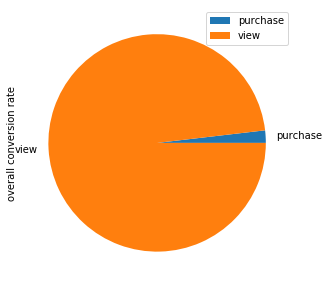

In [19]:
#dataset = dataset.dropna(subset=["event_type"])
num = dataset[dataset.event_type == 'purchase'].product_id.count()
denom = dataset[dataset.event_type == 'view'].product_id.count()
overall_conv_rate = num / denom
tot = num + denom
print(overall_conv_rate)

df = pd.DataFrame({'overall conversion rate': [(num*100)/tot, (denom*100)/tot]},
                  index=['purchase', 'view'])
plot = df.plot.pie(y='overall conversion rate', figsize=(5, 5))

#### Plot the number of purchases of each category

In [4]:
purchases_dataset = dataset[dataset.event_type == 'purchase']
purchases_dataset = purchases_dataset.dropna(subset=["category_code"])

In [5]:
purchases_dataset.category_code.replace('(?=\.).*','',regex=True, inplace = True)
category_list = purchases_dataset.category_code.unique()

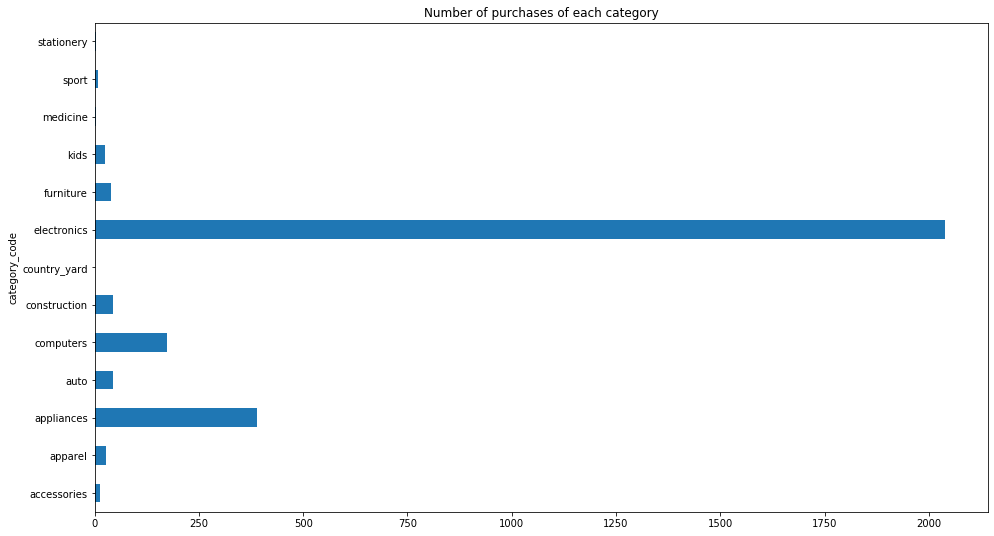

In [6]:
purchases_dataset = purchases_dataset.groupby([purchases_dataset.category_code]).category_code.count()
purchases_dataset.plot.barh(figsize=(16,9), title="Number of purchases of each category")
plt.show()

#### Plot the number of purchases of each category. (plus)

In [7]:
view_dataset = dataset[dataset.event_type == 'view']
view_dataset = view_dataset.dropna(subset=["category_code"])

In [8]:
view_dataset.category_code.replace('(?=\.).*','',regex=True, inplace = True)

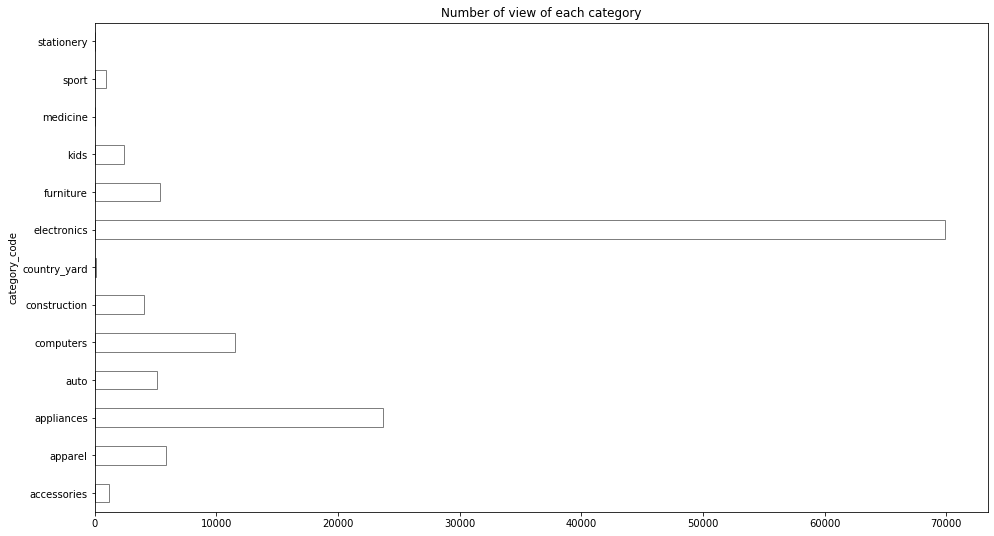

In [9]:
view_dataset = view_dataset.groupby([view_dataset.category_code]).category_code.count()
view_dataset.plot.barh(figsize=(16,9),\
                                 title="Number of view of each category",\
                                  color="white", edgecolor="black", alpha=0.5)
plt.show()

#### show the conversion rate of each category in decreasing order.

In [10]:
def conversion_rate(zip_list):
    return zip_list[0]/zip_list[1]

zip_conversion_rate = zip(category_list, map(conversion_rate , zip(purchases_dataset, view_dataset)))
zip_conversion_rate = sorted(zip_conversion_rate, key = lambda t: t[1], reverse=True)

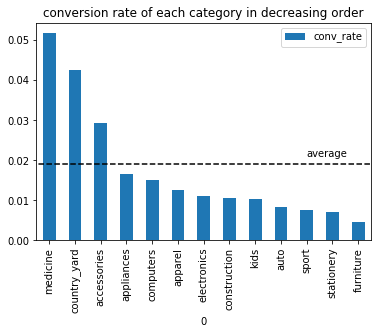

In [11]:
df = pd.DataFrame(list(zip_conversion_rate)).set_index(0)
ax = df.plot(kind='bar', title = 'conversion rate of each category in decreasing order')
ax.legend(["conv_rate"])
ax.hlines(round(overall_conv_rate, 3), -10, 20, linestyles='dashed')
ax.annotate('average',(10,round(overall_conv_rate, 3)+0.002));

In [17]:
print('Category: conversion rate\n')
for i in zip_conversion_rate:
    print(f'{i[0]}: {round(i[1], 3)}')

Category: conversion rate

medicine: 0.052
country_yard: 0.043
accessories: 0.029
appliances: 0.016
computers: 0.015
apparel: 0.013
electronics: 0.011
construction: 0.011
kids: 0.01
auto: 0.008
sport: 0.008
stationery: 0.007
furniture: 0.005
